In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fp = r'/home/rmfeng/Documents/GradSchool/rbda/project/SU19Hadoop/data/weather/isd_stations.txt'

In [3]:
df = pd.read_fwf(fp)

In [7]:
df.head()

,USAF,WBAN,STATION NAME,CTRY,ST,CALL,LAT,LON,ELEV(M),BEGIN,END
0,007018,99999,WXPOD 7018,NaN,NaN,NaN,0.00,0.000,7018.0,20110309,20130730
1,007026,99999,WXPOD 7026,AF,NaN,NaN,0.00,0.000,7026.0,20120713,20170822
2,007070,99999,WXPOD 7070,AF,NaN,NaN,0.00,0.000,7070.0,20140923,20150926
3,008260,99999,WXPOD8270,NaN,NaN,NaN,0.00,0.000,0.0,19960101,20100731
4,008268,99999,WXPOD8278,AF,NaN,NaN,32.95,65.567,1156.7,20100519,20120323


In [8]:
df['BEGIN'] = df['BEGIN'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df['END'] = df['END'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [9]:
df.head()

,USAF,WBAN,STATION NAME,CTRY,ST,CALL,LAT,LON,ELEV(M),BEGIN,END
0,007018,99999,WXPOD 7018,NaN,NaN,NaN,0.00,0.000,7018.0,2011-03-09,2013-07-30
1,007026,99999,WXPOD 7026,AF,NaN,NaN,0.00,0.000,7026.0,2012-07-13,2017-08-22
2,007070,99999,WXPOD 7070,AF,NaN,NaN,0.00,0.000,7070.0,2014-09-23,2015-09-26
3,008260,99999,WXPOD8270,NaN,NaN,NaN,0.00,0.000,0.0,1996-01-01,2010-07-31
4,008268,99999,WXPOD8278,AF,NaN,NaN,32.95,65.567,1156.7,2010-05-19,2012-03-23


### Let's filter the Weather stations to continental US

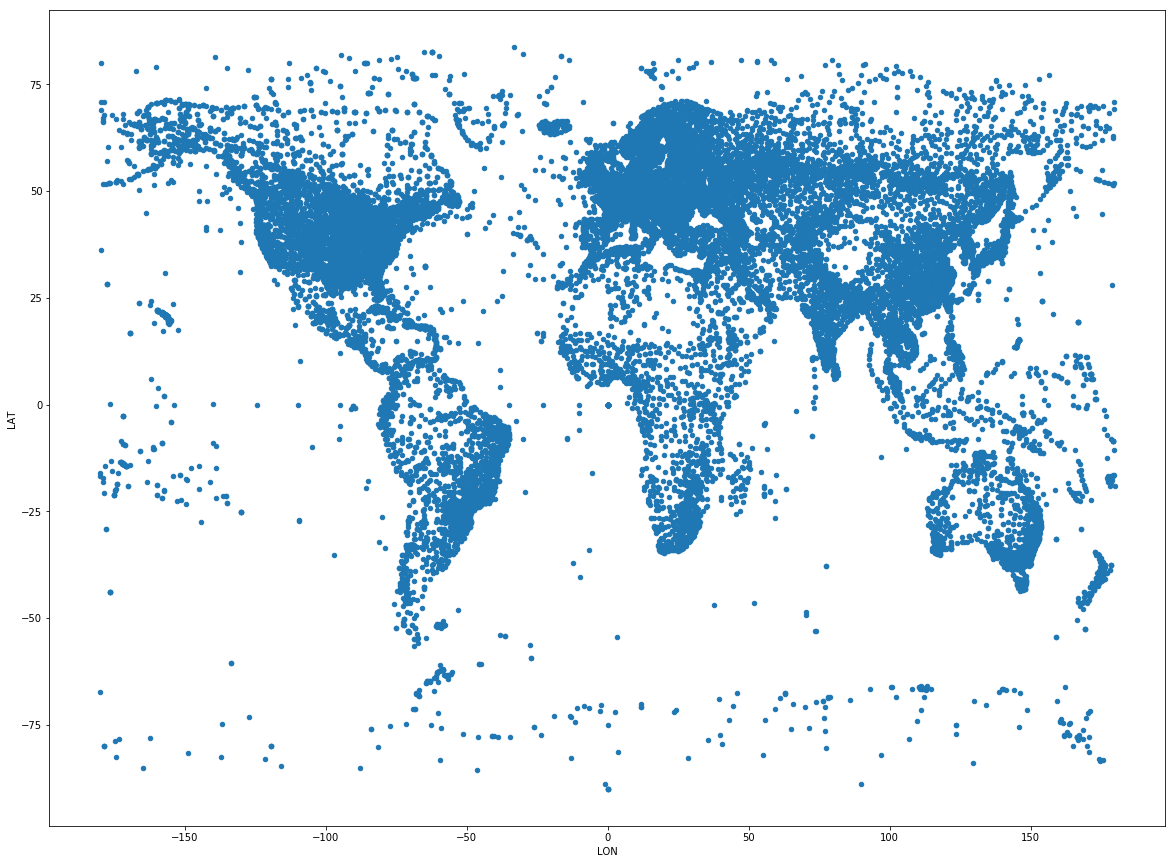

In [28]:
df[['LAT', 'LON']].plot.scatter(x='LON', y='LAT', figsize=(20, 15))
plt.show()

In [30]:
df_us = df[df['CTRY'] == 'US']

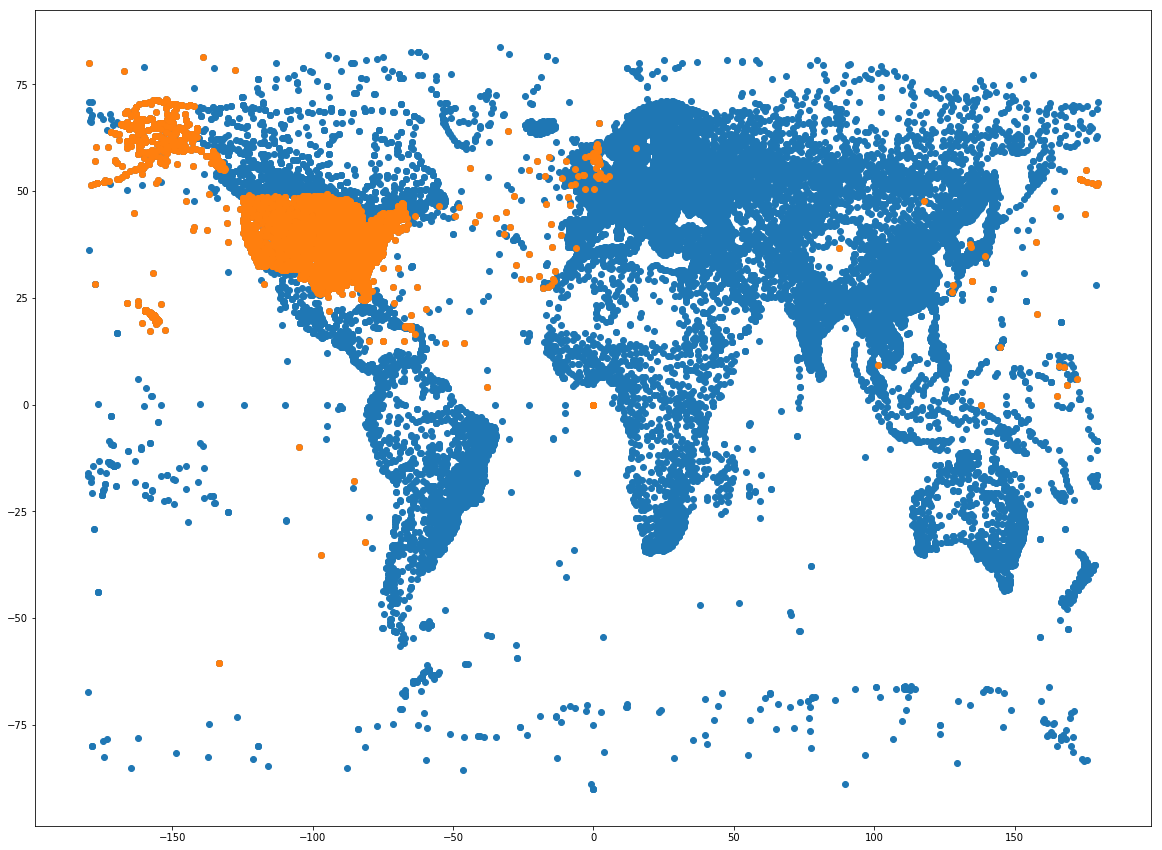

In [31]:
plt.figure(figsize=(20,15))
plt.scatter(x=df['LON'], y=df['LAT'])
plt.scatter(x=df_us['LON'], y=df_us['LAT'])
plt.show()

In [53]:
lon_min, lon_max = -126, -66
lat_min, lat_max = 25, 50

df_us_main = df_us[(df_us['LON'] > lon_min) &
                   (df_us['LON'] < lon_max) &
                   (df_us['LAT'] > lat_min) &
                   (df_us['LAT'] < lat_max)].copy()

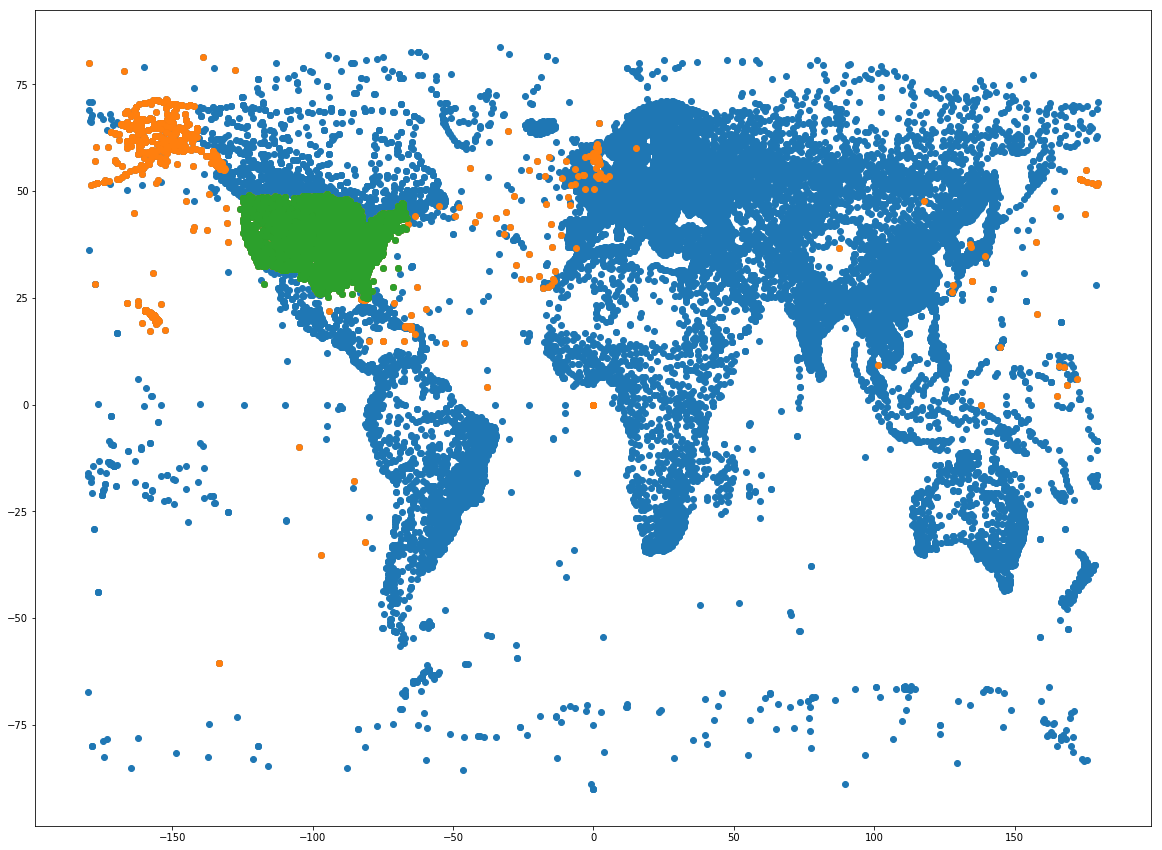

In [35]:
plt.figure(figsize=(20,15))
plt.scatter(x=df['LON'], y=df['LAT'])
plt.scatter(x=df_us['LON'], y=df_us['LAT'])
plt.scatter(x=df_us_main['LON'], y=df_us_main['LAT'])
plt.show()

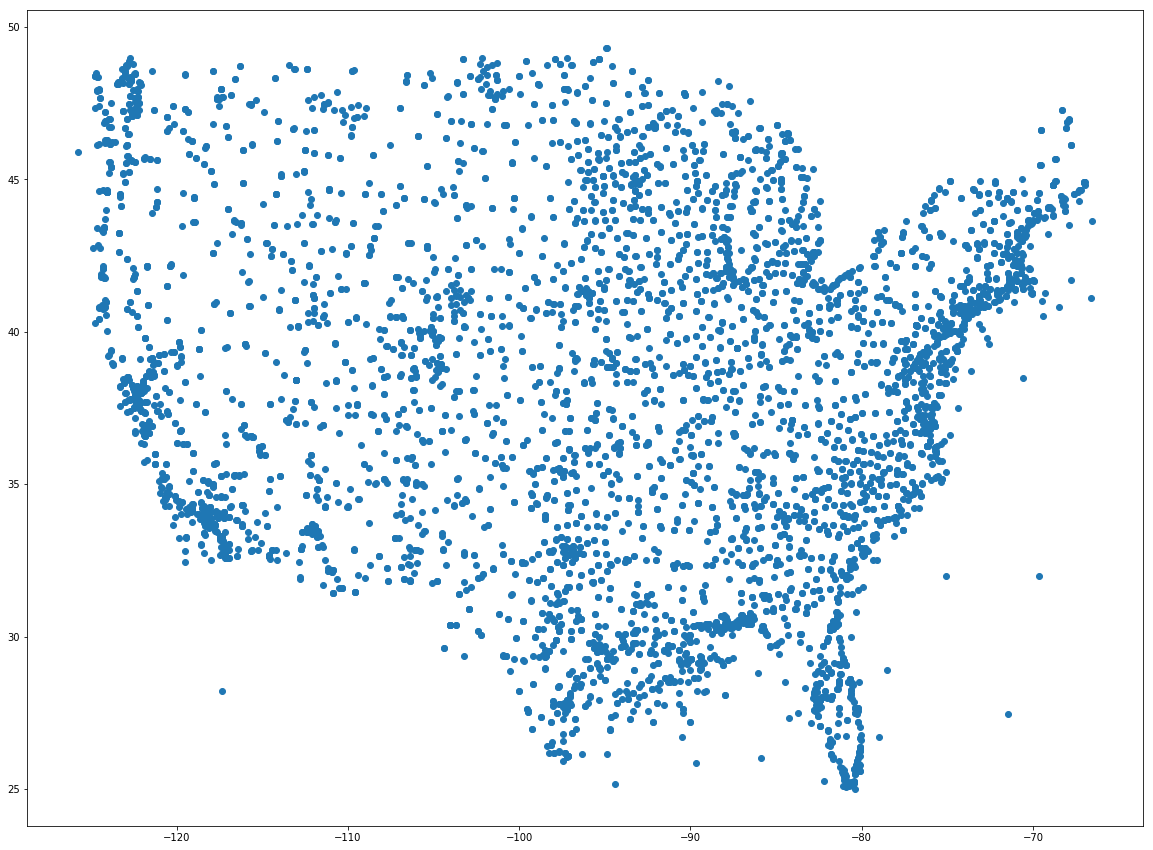

In [36]:
plt.figure(figsize=(20,15))
plt.scatter(x=df_us_main['LON'], y=df_us_main['LAT'])
plt.show()

In [39]:
df_us_main.shape

(6336, 11)

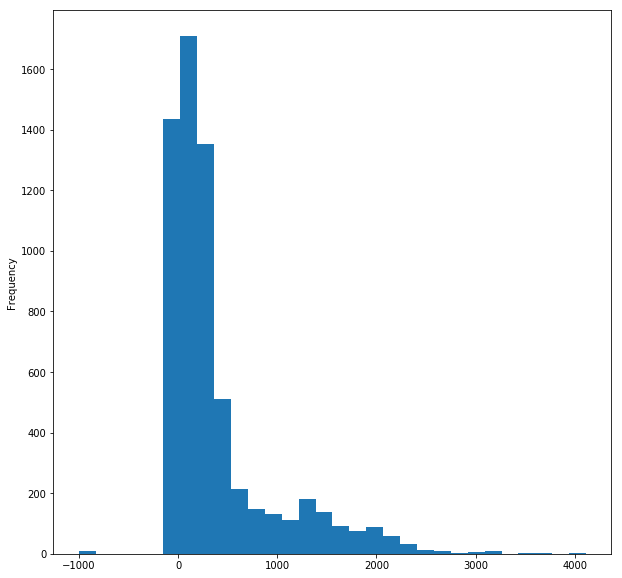

In [45]:
plt.figure(figsize=(10,10))
df_us_main['ELEV(M)'].plot.hist(bins=30)
plt.show()

In [50]:
napa_lat = 38.3
napa_lon = -122.3

napa_arr = np.array([napa_lat, napa_lon])

### which stations are closest to Napa?

In [57]:
ldist = []
for row in df_us_main.iterrows():
    cur_lat = row[1]['LAT']
    cur_lon = row[1]['LON']
    
    cur_arr = np.array([cur_lat, cur_lon])
    cur_dist = np.linalg.norm(napa_arr - cur_arr)
    ldist.append(cur_dist)
df_us_main['dist_to_napa'] = ldist

In [56]:
df_us_main.sort_values('dist_to_napa').head()

,USAF,WBAN,STATION NAME,CTRY,ST,CALL,LAT,LON,ELEV(M),BEGIN,END,dist_to_napa
19832,724955,99999,NAPA CO,US,CA,KAPC,38.213,-122.281,11.0,1973-01-01,1999-12-31,0.089051
19831,724955,93227,NAPA COUNTY AIRPORT,US,CA,KAPC,38.210,-122.285,4.3,2000-01-01,2019-07-11,0.091241
28367,998474,99999,DAVIS POINT SAN PABLO,US,CA,NaN,38.057,-122.259,10.0,2018-01-01,2019-07-10,0.246435
19820,724939,99999,DAVIS POINT AVIATION WE,US,NaN,NaN,38.050,-122.270,18.0,1976-01-30,1996-07-01,0.251794
17357,720406,135,GNOSS FIELD AIRPORT,US,CA,KDVO,38.150,-122.550,1.2,2014-07-31,2019-07-11,0.291548
